In [1]:
import numpy as np

import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt


In [2]:
from astropy.io import fits
fits_image_filename = '../Data/fits/calexp-1-136345.fits'

hdu_list = fits.open(fits_image_filename)

In [3]:
hdu_list.info()

Filename: ../Data/fits/calexp-1-136345.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  COMPRESSED_IMAGE    1 PrimaryHDU     157   ()      
  1                1 CompImageHDU     86   (8176, 6132)   int32   
  2                1 CompImageHDU     92   (8176, 6132)   int32   
  3                1 CompImageHDU     86   (8176, 6132)   int32   
  4                1 BinTableHDU     40   35R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   4R x 2C   [64A, 1J]   
  6                1 BinTableHDU     40   2R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
  7                1 BinTableHDU     40   3R x 6C   [1J, 1J, 1J, 1J, 1J, 1D]   
  8                1 BinTableHDU     26   1R x 3C   [1J, 1D, 1D]   
  9                1 BinTableHDU     40   1R x 6C   [1J, 1J, 1J, 1J, 6J, 6J]   
 10                1 BinTableHDU     36   6R x 5C   [6D, 1D, 1D, 1D, 1D]   
 11                1 BinTableHDU     36   6R x 5C   [1J, 1J, 1J, 1J, 625D]   
 12                1 B

In [4]:
hdu_list[3].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 8176 / length of original image axis                  
NAXIS2  =                 6132 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
WCSAXES =                    2 / Number of WCS axes                             
CRPIX1  =          4103.099096 / Reference pixel on axis 1                      
CRPIX2  =           3048.72111 / Reference pixel on axis 2                      
CRVAL1  =     114.198622288616 / Value at ref. pixel on axis 1                  
CRVAL2  =     76.14362270716

In [5]:
image_data = fits.getdata(fits_image_filename,0)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(6132, 8176)


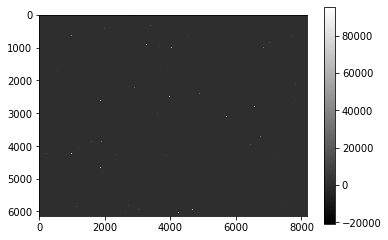

In [6]:
#plt.imshow(image_data, cmap='gray')
plt.imshow(image_data,cmap='gray')
plt.colorbar()

In [7]:
hdu_list[1]

In [8]:
print (image_data.shape)

(6132, 8176)


## Source Detection

In [9]:
from astropy.stats import sigma_clipped_stats
data = image_data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
print((mean, median, std))

(0.21461082264681458, -3.552713678800501e-15, 51.564067783474876)


In [10]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

  id  xcentroid ycentroid  sharpness  ... sky    peak      flux       mag     
----- --------- ---------- ---------- ... --- --------- --------- ------------
    1 5194.9908 0.15033504  0.4083634 ...   0 319.88278 1.0562073 -0.059372888
    2 5356.0612 0.97330059 0.42312957 ...   0 891.47659 3.1235076   -1.2366064
    3 1528.6505  2.9378388 0.59848002 ...   0 1237.5793 3.4711958   -1.3511978
    4 6511.6864  2.6463242 0.71387922 ...   0 2816.0172 8.2775438   -2.2947537
    5 7912.6299  5.2442176 0.39949689 ...   0 68.171739 1.0763473  -0.07988102
    6 1382.8613  6.2160474 0.64381146 ...   0  340.8587 1.0653513 -0.068732144
    7 6497.0209  5.7503968 0.44516186 ...   0  1033.064 3.4133651   -1.3329569
    8 276.03879  6.9460964 0.31413644 ...   0 875.74465 2.8258231   -1.1278624
    9 1133.3625  9.2088094 0.50842887 ...   0 1185.1395  3.896619   -1.4767199
   10 6501.7872  8.9917735 0.64987228 ...   0 1148.4316 3.8400894   -1.4608533
  ...       ...        ...        ... ... ...       

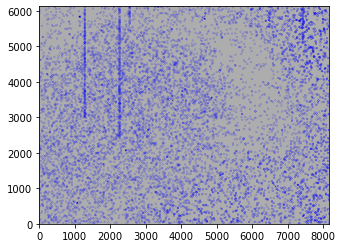

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [12]:
from photutils import IRAFStarFinder
IRASfind = IRAFStarFinder(fwhm=3.0, threshold=5.*std)  
sources = IRASfind(data - median)
for col in sources.colnames:
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id  xcentroid ycentroid    fwhm   ...    sky        peak      flux      mag    
---- --------- --------- --------- ... ---------- --------- --------- ----------
   1 6615.8362 2.6182405 1.6912236 ...  27.093896 229.86112 1082.8819 -7.5864527
   2 3698.8533 4.7066667 1.6864341 ... -5.2439799 94.391639 393.29849 -6.4868057
   3 152.95243 7.0776699  1.785597 ... -56.809783 250.83704 900.21655 -7.3858675
   4 276.08074 6.8964616 2.0326893 ...  179.60631 780.04201 5520.5999 -9.3549657
   5 7789.5616 6.9498956 1.5418905 ... -38.018854 190.09427  627.9666 -6.9948414
   6 8021.8429 6.8535714 1.9552557 ... -6.5549749 95.702634  367.0786 -6.4118977
   7 484.80392 9.0098039 1.7218391 ...  -13.10995 144.20945 534.88595  -6.820653
   8 746.10256 9.7465682 1.9332064 ...  133.28449  1041.367 6749.0022 -9.5730989
   9  3961.492 12.318126 1.5922947 ...  98.324624 489.00113 2126.4339 -8.3191297
  10 935.93077 14.269131  1.723316 ...  80.407692 611.79766 3357.8951 -8.8151678
 ...       ...       ...    

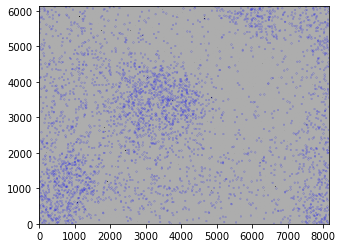

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [14]:
from astropy.stats import sigma_clipped_stats
from photutils import find_peaks
data = image_data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
threshold = median + (10. * std)
tbl = find_peaks(data, threshold, box_size=11)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
print(tbl)

x_peak y_peak peak_value
------ ------ ----------
   959      0  582.08177
  5199      0  566.34983
  6234      0  1735.7574
  5356      1  891.47659
  1528      3  1237.5793
  6512      3  2816.0172
  6496      5  1137.9436
   277      7  959.64833
  1133      9  1185.1395
  1134      9  1185.1395
   ...    ...        ...
  2855   6128  1893.0768
  2995   6128  2008.4443
  3626   6128  1122.2117
  1297   6129   2092.348
   751   6130  4137.5002
  3043   6130  2784.5533
  1280   6131  5301.6637
  2262   6131  2779.3094
  2546   6131  2810.7732
  3934   6131  797.08495
  7426   6131  11972.006
Length = 9007 rows


(0, 6131)

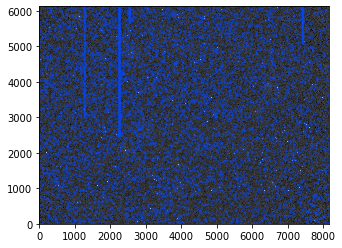

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
apertures = CircularAperture(positions, r=5.)
norm = simple_norm(data, 'sqrt', percent=99.9)
plt.imshow(data, cmap='Greys_r', origin='lower', norm=norm)
apertures.plot(color='#0547f9', lw=1.5)
plt.xlim(0, data.shape[1]-1)
plt.ylim(0, data.shape[0]-1)

## Image Segmentation

In [16]:
from photutils import detect_threshold
threshold = detect_threshold(data, nsigma=3.)
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(data, threshold, npixels=5, filter_kernel=kernel)

Text(0.5, 1.0, 'Segmentation Image')

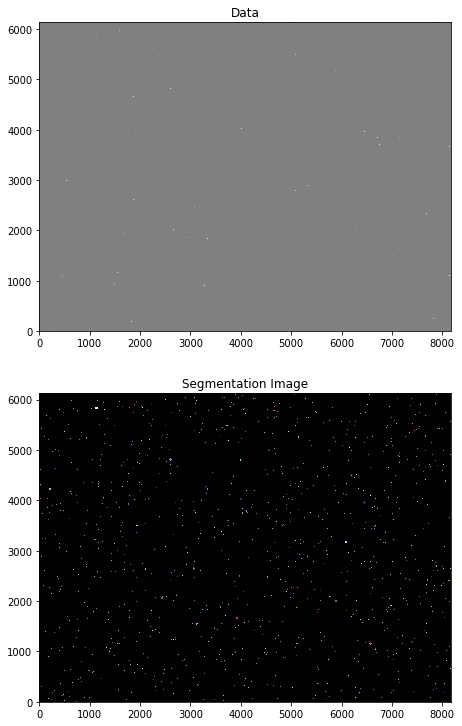

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
cmap = segm.make_cmap(random_state=12345)
ax2.imshow(segm, origin='lower', cmap=cmap)
ax2.set_title('Segmentation Image')

In [18]:
from photutils import deblend_sources
segm_deblend = deblend_sources(data, segm, npixels=5,filter_kernel=kernel, nlevels=32,contrast=0.001)

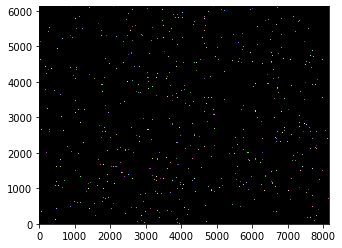

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
cmap = segm_deblend.make_cmap(random_state=12345)
plt.imshow(segm_deblend, origin='lower', cmap=cmap)

In [19]:
from astropy.convolution import Gaussian2DKernel
from photutils.datasets import make_100gaussians_image
from photutils import Background2D, MedianBackground
from photutils import detect_threshold, detect_sources
data = image_data
bkg_estimator = MedianBackground()
bkg = Background2D(data, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
threshold = bkg.background + (3. * bkg.background_rms)


In [20]:
from astropy.stats import gaussian_fwhm_to_sigma
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
npixels = 5
segm = detect_sources(data, threshold, npixels=npixels,filter_kernel=kernel)
segm_deblend = deblend_sources(data, segm, npixels=npixels,filter_kernel=kernel, nlevels=32,contrast=0.001)

In [21]:
from photutils import source_properties
cat = source_properties(data, segm_deblend)
tbl = cat.to_table()
tbl['xcentroid'].info.format = '.2f'
tbl['ycentroid'].info.format = '.2f'
tbl['bbox_xmax'].info.format = '.2f'
tbl['bbox_xmin'].info.format = '.2f'
tbl['bbox_ymax'].info.format = '.2f'
tbl['bbox_ymin'].info.format = '.2f'
tbl['ellipticity'].info.format = '.2f'
tbl['gini'].info.format = '.2f'
print(tbl)

  id  xcentroid ycentroid ...         cxy                 cyy         gini
         pix       pix    ...       1 / pix2            1 / pix2          
----- --------- --------- ... -------------------- ------------------ ----
    1    959.15      0.13 ...  -1.3579147819773079  8.861031512082178 0.41
    2   5357.82      1.85 ...  -1.0781917861758252 1.2339543380396065 0.33
    3   6236.80      1.48 ...  -1.0601767927691514 1.2720851309241281 0.47
    4   6509.91      1.67 ...  -0.9310195926302989 1.0765554283134482 0.46
    5   1528.78      2.95 ...  0.11135714459150907  1.094288282488108 0.43
    6   6499.05      7.04 ...    -1.22205063765728  1.031914265401534 0.41
    7    276.05      6.96 ... -0.07289689249675935 0.9271660088819038 0.33
    8   1133.38      9.27 ...  0.09486841411344409 1.1499589600642175 0.44
    9    746.17      9.62 ...  0.22993929898477464  1.285743501854885 0.44
   10   1150.75     11.46 ...  0.10176696237786916 1.2866921838200052 0.27
  ...       ...       ...

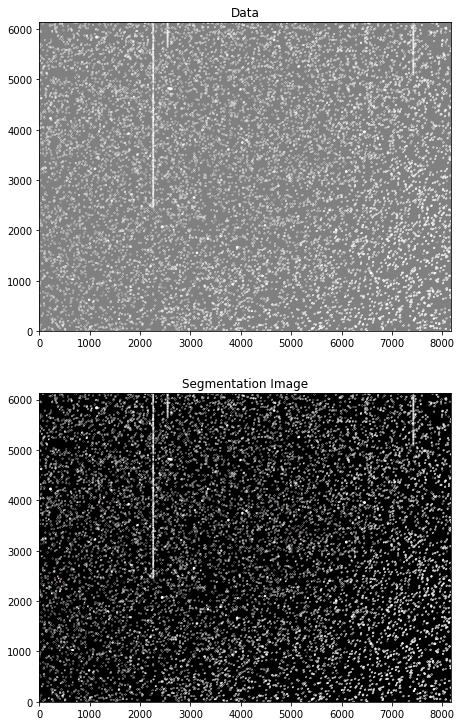

In [22]:
import numpy as np
import astropy.units as u
from photutils import source_properties, EllipticalAperture
cat = source_properties(data, segm_deblend)
r = 3.  # approximate isophotal extent
apertures = []
for obj in cat:
    position = np.transpose((obj.xcentroid.value, obj.ycentroid.value))
    a = obj.semimajor_axis_sigma.value * r
    b = obj.semiminor_axis_sigma.value * r
    theta = obj.orientation.to(u.rad).value
    apertures.append(EllipticalAperture(position, a, b, theta=theta))

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
cmap = segm_deblend.make_cmap(random_state=12345)
ax2.imshow(segm_deblend, origin='lower', cmap=cmap)
ax2.set_title('Segmentation Image')
for aperture in apertures:
    aperture.plot(axes=ax1, color='white', lw=1.5)
    aperture.plot(axes=ax2, color='white', lw=1.5)